## Section 1, Part A

In [81]:
import pandas as pd
from collections import Counter
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
tweet_data = pd.read_csv("training_data.csv")
#print(tweet_data.head())
print (tweet_data.columns)
#print(np.mean(tweet_data['retweet_count']))

Index(['favorite_count', 'full_text', 'hashtags', 'retweet_count', 'year',
       'dim1_nominate', 'dim2_nominate'],
      dtype='object')


(a) Create a table that contains information on minimum, average, median, and maximum for the
following: tweet length (#characters and #words) (text column), hashtag length (#characters and
#words) (hashtags column) (Add your table to the report.) (4 points) (2 points for graduate
students)

In [82]:
# find tweet length (characters).
def tweetchar (tweet):
    return len(tweet) - 3
    # Tweets follow a format of b' {text} ' - so, three characters which don't actually add anything. What's inside of that is the actual tweet.
    # While I could strip out the first two and last character I feel like that'll add up in terms of time.
    # also i cba rn lmao, maybe later

# find tweet length (words).
def tweetlength (tweet):
    words = re.findall(r'\w+', tweet[1::])
    return len(words)

# find hashtag length (characters)
def hashtagchar (hashtags):
   tags = hashtags.split(' ')
   count = 0
   for tags in tags:
       count += len(tags)
   return count

#find number of hashtags
def hashtagnum (hashtags):
   tags = hashtags.split(' ')
   return len(tags)

In [83]:
print(tweet_data.shape)
hashtag_characters = np.empty(0)
hashtag_numbers = np.empty(0)
i = 0
for hashtag in tweet_data['hashtags']:
    hashtag_characters = np.append(hashtag_characters, hashtagchar(hashtag))
    hashtag_numbers = np.append(hashtag_numbers, hashtagnum(hashtag))




(333987, 7)


In [84]:
df_describe_hashtagchars = pd.DataFrame(hashtag_characters)
df_describe_hashtagchars.describe()

,0
count,333987.000000
mean,14.044142
std,9.520043
min,1.000000
25%,8.000000
50%,12.000000
75%,18.000000
max,168.000000


In [85]:
df_describe_hashtagnums = pd.DataFrame(hashtag_numbers)
df_describe_hashtagnums.describe()
#For some reason, at least some IDEs, this doesn't display properly until you run it seperately. Seems to work in Jupyter Notebook, though, so...

,0
count,333987.00000
mean,1.49198
std,0.84594
min,1.00000
25%,1.00000
50%,1.00000
75%,2.00000
max,17.00000


In [86]:
tweet_characters = np.empty(0)
tweet_words = np.empty(0)
i = 0
for tweet in tweet_data['full_text']:
    tweet_characters = np.append(tweet_characters, tweetchar(tweet))
    tweet_words = np.append(tweet_words, tweetlength(tweet))



In [87]:
df_describe_tweetwords = pd.DataFrame(tweet_words)
df_describe_tweetwords.describe()


,0
count,333987.000000
mean,29.607251
std,13.232416
min,1.000000
25%,20.000000
50%,25.000000
75%,40.000000
max,598.000000


In [88]:
df_describe_tweetchars = pd.DataFrame(tweet_characters)
df_describe_tweetchars.describe()

,0
count,333987.000000
mean,180.176139
std,74.561726
min,4.000000
25%,130.000000
50%,151.000000
75%,245.000000
max,2434.000000


b) Find the top ten most commonly used hashtags (hashtags column). Then, create a bar chart which show the count values of these ten most commonly used hashtags. Do you observe any patterns? What are the meanings / interpretations of the hashtags you have identified? Write your findings in the report. (Add the bar chart to the report.) (4 points) (2 points for graduate students)

[('COVID19', 4870), ('SOTU', 2901), ('Obamacare', 2182), ('coronavirus', 1524), ('utpol', 1387), ('GOPTaxScam', 1349), ('TaxReform', 1248), ('ProtectOurCare', 1237), ('IA03', 1214), ('ForThePeople', 1085)]


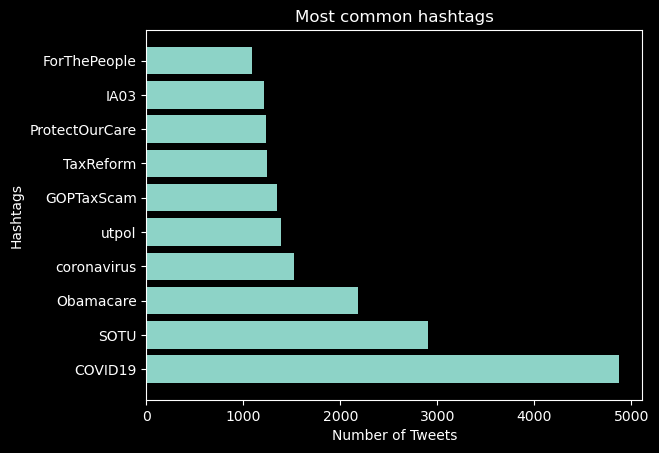

In [89]:
a = Counter(tweet_data['hashtags']).most_common(10)
hashtags = list()
hastagnums = list()
print(a)
for h in a:
    hashtags.append(h[0])
    hastagnums.append(h[1])
n = plt.barh(hashtags, hastagnums)
plt.title('Most common hashtags')
plt.xlabel('Number of Tweets')
plt.ylabel('Hashtags')
plt.show()

- Big events like the State of the Union, hot-button issues like Obamacare or the pandemic attract the most attention

c) To answer this question, first please read the description above DW-NOMINATE scores provided
at the beginning of this assignment document. Then, please divide your training dataset into four
subsets by focusing on the following ideological dimensions:

a. Group 1: Dim 1 (0 to 1), Dim 2 (0 to 1)

b. Group 2: Dim 1 (0 to 1), Dim 2 (0 to -1)

c. Group 3: Dim 1 (0 to -1), Dim 2 (0 to 1)

d. Group 4: Dim 1 (0 to -1), Dim 2) (0 to -1)

In [90]:
group1 = tweet_data[(tweet_data['dim1_nominate'] > 0) & tweet_data['dim2_nominate'] > 0]
group2 = tweet_data[(tweet_data['dim1_nominate'] > 0) & tweet_data['dim2_nominate'] <= 0]
group3 = tweet_data[(tweet_data['dim1_nominate'] <= 0) & tweet_data['dim2_nominate'] > 0]
group4 = tweet_data[(tweet_data['dim1_nominate'] <= 0) & tweet_data['dim2_nominate'] <= 0]



[('Obamacare', 2064), ('COVID19', 1791), ('SOTU', 1777), ('TaxReform', 1199), ('IA03', 1078), ('utpol', 1043), ('MS01', 888), ('taxreform', 879), ('coronavirus', 790), ('SouthJersey', 754)]


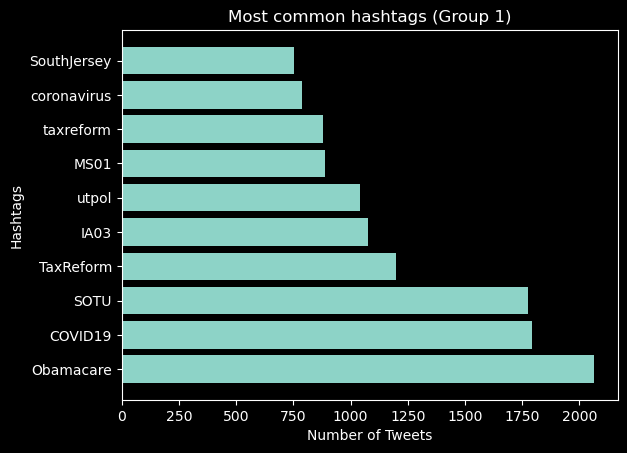

In [91]:
#Group 1 Bargraph: Dim 1 (0 to 1), Dim 2 (0 to 1)
a = Counter(group1['hashtags']).most_common(10)
print(a)
hashtags = list()
hastagnums = list()
for h in a:
    hashtags.append(h[0])
    hastagnums.append(h[1])
n = plt.barh(hashtags, hastagnums)
plt.title('Most common hashtags (Group 1)')
plt.xlabel('Number of Tweets')
plt.ylabel('Hashtags')
plt.show()

[('COVID19', 3079), ('GOPTaxScam', 1348), ('ProtectOurCare', 1237), ('SOTU', 1124), ('ForThePeople', 1084), ('GetCovered', 982), ('ACA', 919), ('Trumpcare', 865), ('TrumpShutdown', 803), ('coronavirus', 734)]


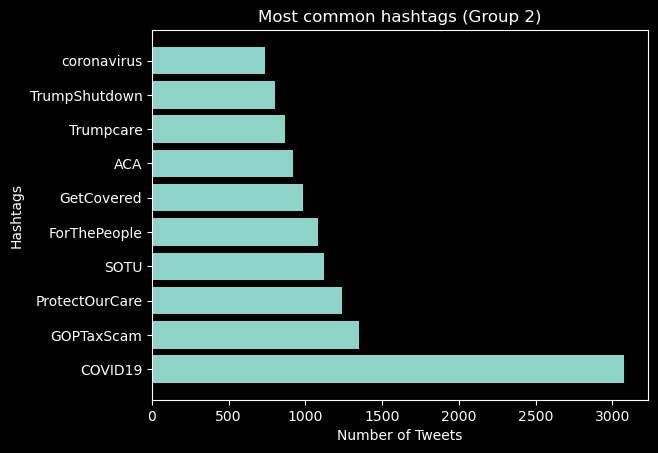

In [92]:
#Group 2 Bargraph: Dim 1 (0 to 1), Dim 2 (0 to -1)

a = Counter(group2['hashtags']).most_common(10)
print(a)
hashtags = list()
hastagnums = list()
for h in a:
    hashtags.append(h[0])
    hastagnums.append(h[1])
n = plt.barh(hashtags, hastagnums)
plt.title('Most common hashtags (Group 2)')
plt.xlabel('Number of Tweets')
plt.ylabel('Hashtags')
plt.show()

[('COVID19', 3079), ('GOPTaxScam', 1348), ('ProtectOurCare', 1237), ('SOTU', 1124), ('ForThePeople', 1084), ('GetCovered', 982), ('ACA', 919), ('Trumpcare', 865), ('TrumpShutdown', 803), ('coronavirus', 734)]


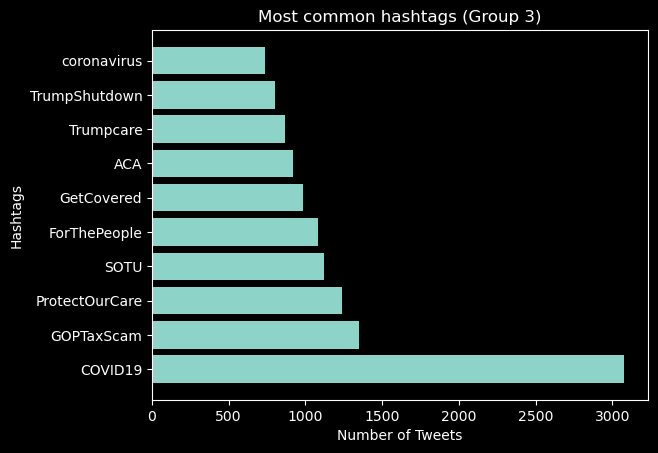

In [93]:
#Group 3 Bargraph: Dim 1 (0 to -1), Dim 2 (0 to 1)

a = Counter(group3['hashtags']).most_common(10)
print(a)
hashtags = list()
hastagnums = list()
for h in a:
    hashtags.append(h[0])
    hastagnums.append(h[1])
n = plt.barh(hashtags, hastagnums)
plt.title('Most common hashtags (Group 3)')
plt.xlabel('Number of Tweets')
plt.ylabel('Hashtags')
plt.show()

[('Obamacare', 2064), ('COVID19', 1791), ('SOTU', 1777), ('TaxReform', 1199), ('IA03', 1078), ('utpol', 1043), ('MS01', 888), ('taxreform', 879), ('coronavirus', 790), ('SouthJersey', 754)]


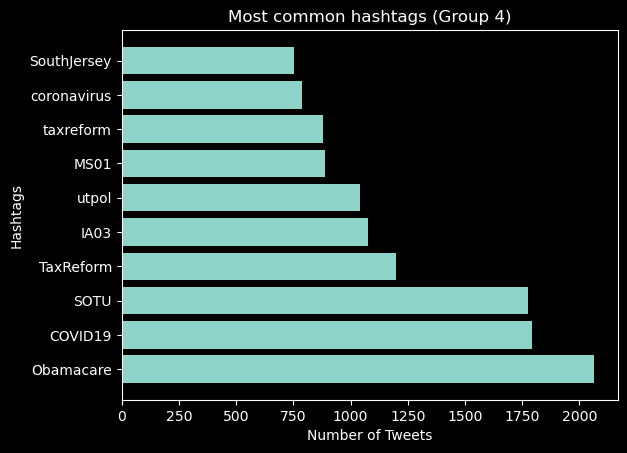

In [94]:
#Group 4 Bargraph: Dim 1 (0 to -1), Dim 2 (0 to -1)

a = Counter(group4['hashtags']).most_common(10)
print(a)
hashtags = list()
hastagnums = list()
for h in a:
    hashtags.append(h[0])
    hastagnums.append(h[1])
n = plt.barh(hashtags, hastagnums)
plt.title('Most common hashtags (Group 4)')
plt.xlabel('Number of Tweets')
plt.ylabel('Hashtags')
plt.show()

d) Divide the training dataset into two along the 1st dimension. All observations that have a value
bigger than zero (in the 1st dimension) should be designated as ‘conservative’, all other
observations should be designed as ‘liberal’. Create a ridge plot that shows the changes in these
values (1st dimension) through the years for two different ideological groups. Color the
conservative group as red, color the liberal group as blue.

0
13
1
13
2
13
3
13
4
13
5
13
6
13
7
13
8
13
9
13
10
13
11
13
12
13


/tmp/ipykernel_10992/520556972.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


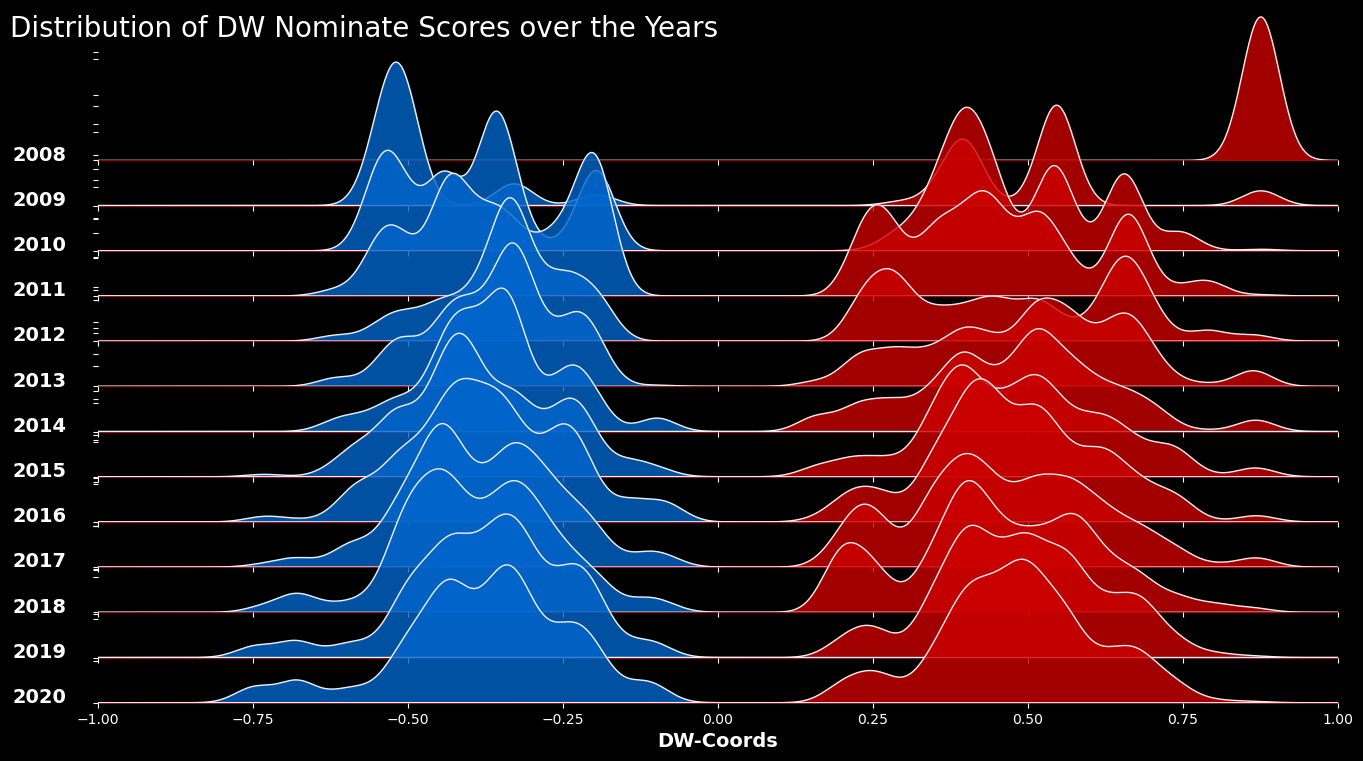

In [95]:
# ridge plot code modified from: https://matplotlib.org/matplotblog/posts/create-ridgeplots-in-matplotlib/
conservative = tweet_data[tweet_data['dim1_nominate'] > 0]
liberal = tweet_data[tweet_data['dim1_nominate'] <= 0]


years = sorted(tweet_data['year'].unique())

gs = grid_spec.GridSpec(len(years),1)
fig = plt.figure(figsize=(16,9))

i = 0

color_lib = '#0066cc'
color_con = '#cc0000'

ax_objs = []
for y in years:
    # creating new axes object
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))
    y = years[i]

    #LIBERAL
    x_lib = np.array(liberal[liberal.year == y].dim1_nominate)
    if(len(x_lib > 1)):
        x_d_lib = np.linspace(-1,1, 1000)
        kde_lib = KernelDensity(bandwidth=0.03, kernel='gaussian')
        kde_lib.fit(x_lib[:, None])
        logprob_lib = kde_lib.score_samples(x_d_con[:, None])
        # plotting the distribution
        ax_objs[-1].plot(x_d_lib, np.exp(logprob_lib),color="#f0f0f0",lw=1)
        ax_objs[-1].fill_between(x_d_lib, np.exp(logprob_lib), alpha=0.8,color=color_lib)

    #CONSERVATIVE
    x_con = np.array(conservative[conservative.year == y].dim1_nominate)

    if(len(x_con > 1)):
        x_d_con = np.linspace(-1,1, 1000)
        kde_con = KernelDensity(bandwidth=0.03, kernel='gaussian')
        kde_con.fit(x_con[:, None])
        logprob_con = kde_con.score_samples(x_d_con[:, None])
        # plotting the distribution
        ax_objs[-1].plot(x_d_con, np.exp(logprob_con),color="#f0f0f0",lw=1)
        ax_objs[-1].fill_between(x_d_con, np.exp(logprob_con), alpha=0.8,color=color_con)



    # setting uniform x and y lims
    ax_objs[-1].set_xlim(-1,1)
    ax_objs[-1].set_ylim(0,None)

    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)

    # remove borders, axis ticks, and labels
    ax_objs[-1].set_yticklabels([])

    if i == len(years)-1:
        ax_objs[-1].set_xlabel("DW-Nominate Scores", fontsize=14,fontweight="bold")
    else:
        ax_objs[-1].set_xticklabels([])

    spines = ["top","right","left","bottom"]
    print(i)
    print(len(years))
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)
    y = str(y)
    adj_year = y.replace(" ","\n")
    ax_objs[-1].text(-1.05,0,adj_year,fontweight="bold",fontsize=14,ha="right")


    i += 1

gs.update(hspace=-0.7)

fig.text(0.07,0.85,"Distribution of Tweet DW Nominate Scores over the Years",fontsize=20)

plt.tight_layout()
plt.show()


Finally, find the top-10 tweets that are ideologically most different from each other by calculating
the Euclidean distances for the following:

a. Top-10 most distant tweets along both dimensions

b. Top-10 most distant tweets along the 1st dimension

c. Top-10 most distant tweets along the 2nd dimension

Please report your findings in the form of tables [tweet pairs that are ideologically distant and the
distance value]. Do you observe any patterns? Please explain. Write your findings in the report.
(Add the tables to the report.)